# Arboles de decision


## Cargar Librerias

In [1]:
# cargar librerias
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree








### Importar datos

In [2]:
url=r"C:\Users\ferna\Documents\Master\AI\Tarea1\pima-indians-diabetes.csv"
url = "https://www.openml.org/data/get_csv/61/dataset_61_iris.arff"
dataset= read_csv(url)
Columna_a_predecir= 'class'

## Analizar datos

       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


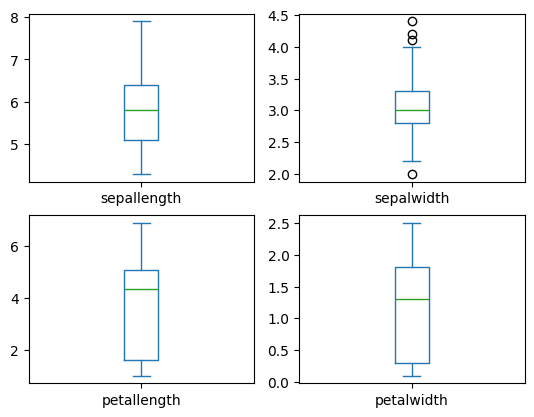

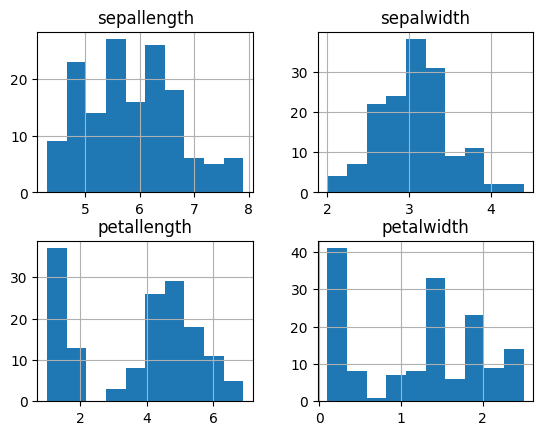

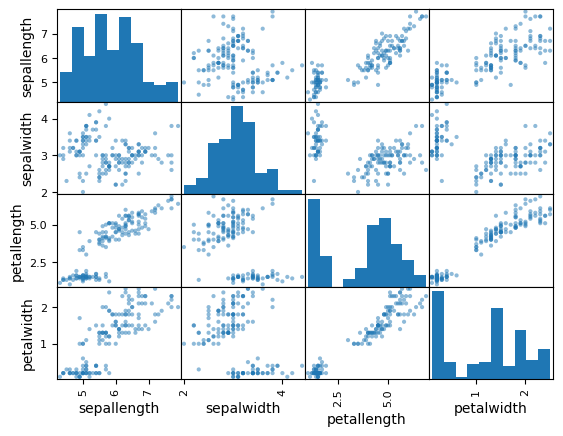

In [3]:
# mostramos un resumen estadístico de los datos
print(dataset.describe())

# distribución por clases
print()
print(dataset.groupby('class').size())

# gráficos univariable:
 # diagramas de caja (box and whisker)
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

 # histogramas
dataset.hist()
pyplot.show()

# gráficos multivariable
 # matriz de dispersión
scatter_matrix(dataset)
pyplot.show()

## Dividir datos 

In [4]:
# Y= dato a precedir X= entrada de valores


y=dataset[Columna_a_predecir]
x=dataset.drop(columns=[Columna_a_predecir])

x_train,x_validation,y_train,y_validation = train_test_split(x,y,test_size=0.2,random_state=1,shuffle=True)

## Comparar modelos

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ferna\AppD

LR: 0.941667 (0.065085)
CART: 0.958333 (0.041667)
RandomForest: 0.941667 (0.053359)


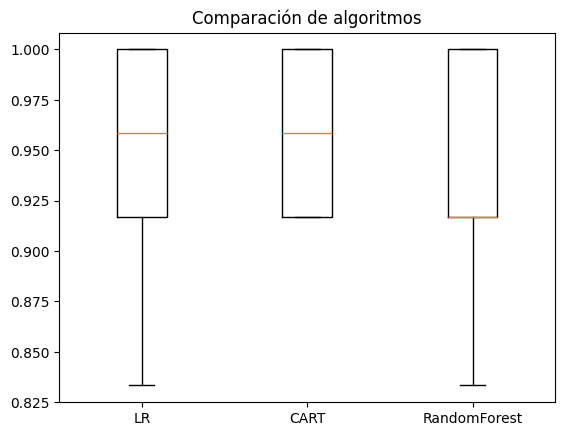

In [5]:
# Cargamos los algoritmos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RandomForest',RandomForestClassifier()))

# Entrenar el modelo
#model.fit(X_train, y_train)))

# evaluamos cada modelo por turnos
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle= True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Comparación de algoritmos
pyplot.boxplot(results, tick_labels=names)
pyplot.title('Comparación de algoritmos')
pyplot.show()



## Entrenar modelo

In [9]:
# Realizamos predicciones con el dataset de validación
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# validar modelo
predictions = model.predict(x_validation)


## Metricas/ Graficos del modelo

In [10]:
# Evaluamos las predicciones, en primer lugar la precisión obtenida
print("Accuracy score:")
print(accuracy_score(y_validation, predictions))

# ahora la matriz de confusión (vemos en este ejemplo que sólo hemos cometido un fallo)
print("\nConfusion matrix")
print(confusion_matrix(y_validation, predictions))

# y finalmente un informe de clasificación que ofrece un desglose de cada clase por precisión, 
print("\n Clasification report:")
print(classification_report(y_validation, predictions))


Accuracy score:
0.9666666666666667

Confusion matrix
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

 Clasification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



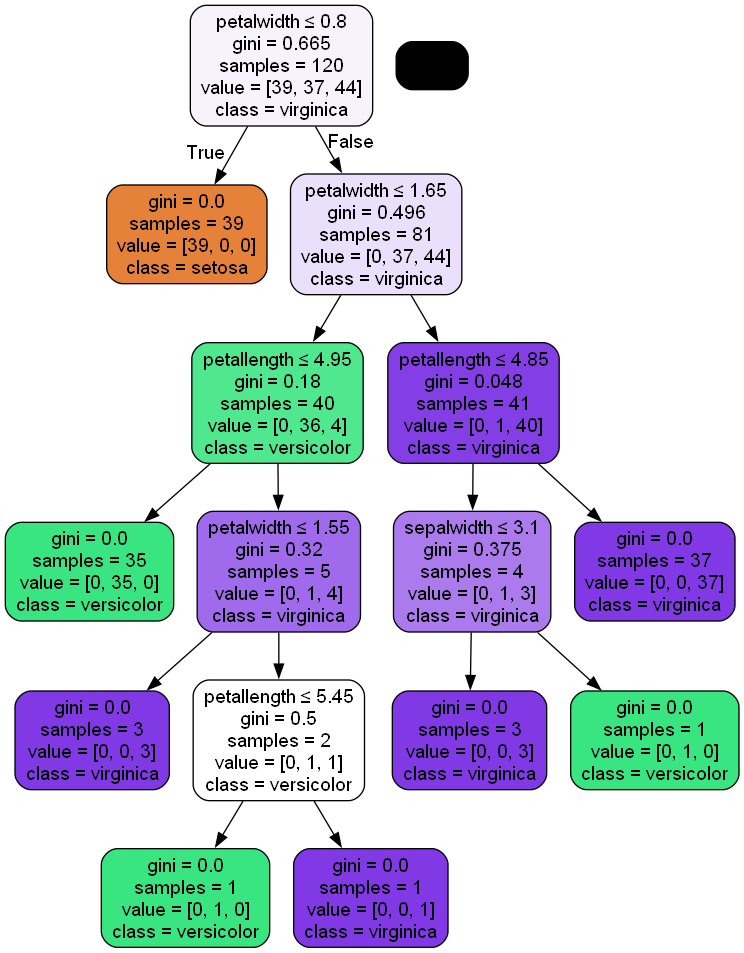

In [15]:
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files (x86)\Graphviz\bin"
from sklearn import tree
import pydotplus
from IPython.display import Image

# Generate DOT data for the single Decision Tree
data = tree.export_graphviz(model, out_file=None, 
                            feature_names=dataset.columns.values[0:4], 
                            class_names=["setosa", "versicolor", "virginica"], 
                            filled=True, rounded=True, special_characters=True)

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(data)

# Write graph to a PNG file
graph.write_png('mydecisiontree.png')

# Display the image
Image(filename='mydecisiontree.png')



## Predecir

In [16]:
datasetToPredict=[6.0, 3.0, 5.0, 2.0]

predictions=model.predict([datasetToPredict])
print(predictions)

['Iris-virginica']


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
